# 3. Data Cleaning & Exploratory Data Analysis (EDA)


# Table of Contents

1. **Introduction**
   - Overview of the dataset and business context
   - Objective of the analysis

2. **Data Cleaning**
   - Handling missing values
   - Removing irrelevant columns
   - Transforming Categorical variables
      - Frequency Encoding
      - One Hot Encoding  
   - Detecting and handling outliers
      - Z-score
      - IQR Methods
        
3. **Exploratory Data Analysis (EDA)**
   - Univariate analysis
   - Bivariate analysis
   - Feature correlations
     - Correlation map
       
4. **Feature Engineering**
   - Derived features
      - Average Monthly spend
      - Chrun Risk Category
      - Lifetime Revenue
   - Visualization of Relationships
      - Average Monthly spend vs Chrum Value
      - Chrun Risk Categorical Distribution
      - Lifetime Revenue vs Chrun value
   - Correlation Analysis
      - Confirming Dataset readiness and validating derived features 

# 1) Introduction


## 1.1) Dataset Overview

The dataset contains 7043 observations and 33 variables, providing customer information related to demographics, geography, service usage, billing, and churn indicators. Below is a summary of the dataset's key components:

| Category         | Details                                                                                 |
|------------------|-----------------------------------------------------------------------------------------|
| Demographics     | Gender, Senior Citizen, Partner, Dependents                                            |
| Geography        | Country, State, City, Zip Code, Lat Long                                               |
| Services         | Phone Service, Internet Service, Online Security, Tech Support, etc.                  |
| Billing          | Monthly Charges, Total Charges, Payment Method, Paperless Billing                     |
| Churn Indicators | Churn Label, Churn Value, Churn Score, CLTV, Churn Reason                              |

## Business Context

Customer churn is a significant issue for subscription-based businesses, leading to revenue losses and increased customer acquisition costs. This dataset allows us to predict customer churn (1 for churned, 0 for not churned) and analyze the factors driving it.

### Business Objectives

1. Identify customers at risk of churning to implement retention strategies.
2. Focus on cost-efficient customer retention instead of costly new acquisitions.
3. Analyze churn reasons to improve customer experience and service offerings.

This dataset can be used for predictive modeling, focusing on churn prediction using binary classification techniques.

## 1.2) Objective of the Analysis

The primary goal of this analysis is to:

1. Identify patterns and drivers behind customer churn.
2. Provide actionable insights to reduce churn rates and improve customer retention.
3. Understand the characteristics of high-value customers to target retention efforts effectively.


# 2) Data Cleaning

## 2.1) Missing Values

Advanced Missing Value Handling:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../data/processed/ingested_data_20250105_192040.csv")
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [2]:
if df.isnull().sum().sum() > 0:
    print(f"Dataset contains {df.isnull().sum().sum()} missing values.")


Dataset contains 5174 missing values.


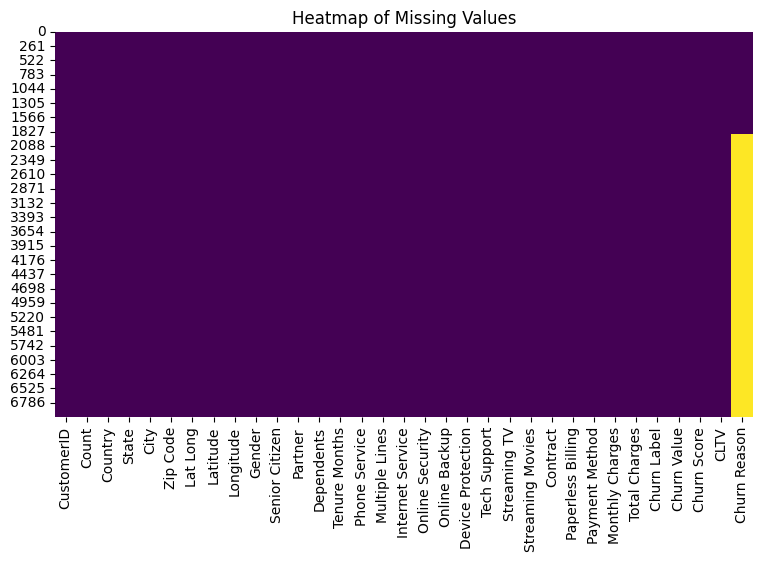

In [3]:
import seaborn as sns
# Plot a heatmap of missing values
plt.figure(figsize=(9, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

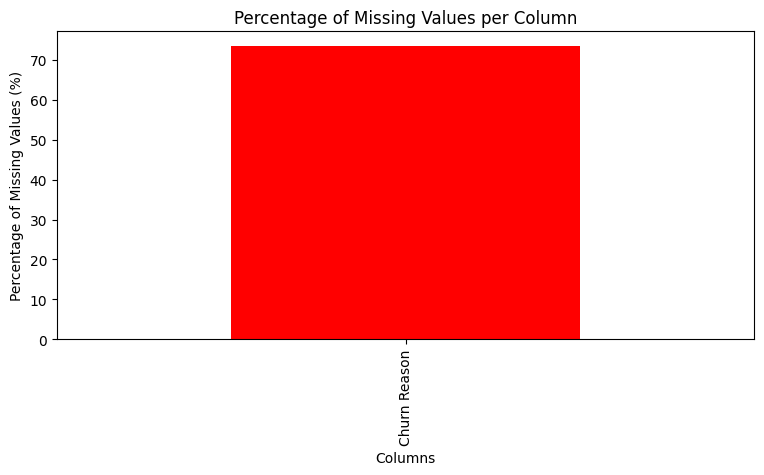

In [4]:
# Calculate percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Plot as a bar chart
plt.figure(figsize=(9, 4))
missing_percentage.sort_values(ascending=False).plot(kind="bar", color="red")
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Percentage of Missing Values (%)")
plt.xlabel("Columns")
plt.show()


In [5]:
print(df['Churn Reason'].unique())

['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased' nan]


Churn Value is your target variable, the best approach depends on the proportion of missing values and the relationships in your dataset:

- If Missingness is High (e.g., > 30%):
"Don't know" substitution to retain data and avoid overcomplicating the pipeline. We use this as a baseline.
Test predictive modeling for imputing Churn Reason and evaluate if it significantly improves model performance for predicting Churn Value.

- If Missingness is Moderate (e.g., 10-30%):
Grouped imputation is a good choice, particularly if Churn Reason correlates strongly with features like Churn Value or Contract.

- If Missingness is Low (e.g., < 10%):
"Don't know" substitution is sufficient as the impact of the missing values on the model will be minimal.


##### Substituting Missing Values with "Don't know":



In [6]:
# Replace missing values with "Don't know"
df['Churn Reason'] = df['Churn Reason'].fillna("Don't know")


Missing Values per Column:
CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

Percentage of Missing Values:
CustomerID           0.0
Count                0.0
Country              0.0
State                0.0
City                 0.0
Zip Code             0.0
Lat Long            

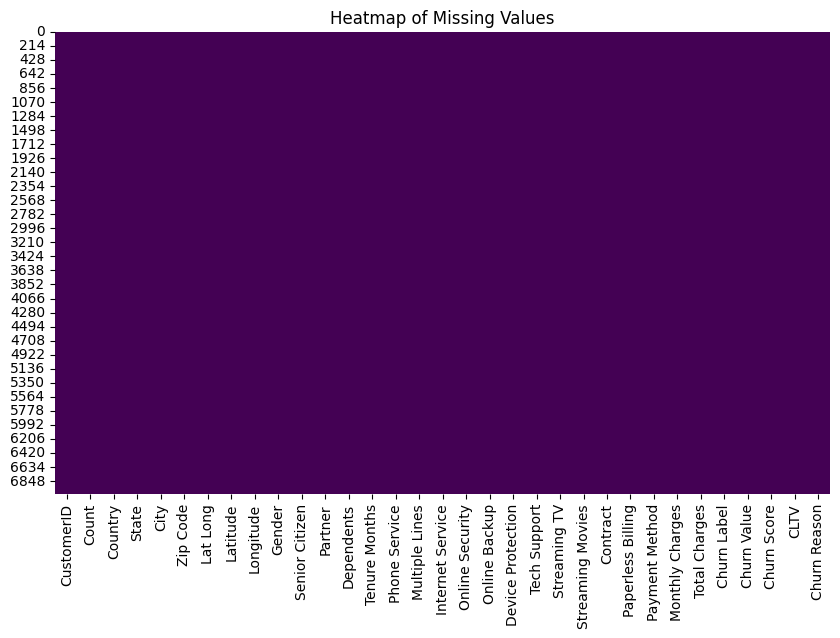

In [7]:
# Check the total number of missing values per column
print("Missing Values per Column:")
print(df.isnull().sum())

# Check the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Visualize missing values with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()


## 2.2) Removing irrelevant columns 

The Zip Code column was dropped from the dataset due to its limited contribution to the overall predictive power of the churn analysis.

In [8]:
# Drop the column 'Zip Code' from the DataFrame
df = df.drop(columns=['Zip Code'])

# Display the first few rows to confirm the column is dropped
print(df.head())


   CustomerID  Count        Country       State         City  \
0  3668-QPYBK      1  United States  California  Los Angeles   
1  9237-HQITU      1  United States  California  Los Angeles   
2  9305-CDSKC      1  United States  California  Los Angeles   
3  7892-POOKP      1  United States  California  Los Angeles   
4  0280-XJGEX      1  United States  California  Los Angeles   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  ...  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No  ...   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No  ...   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No  ...   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No  ...   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No  ...   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1 

While "Zip Code" was deemed irrelevant, other columns, such as "State" and "City", may hold latent information that could help capture regional or urban-rural differences in customer behavior. Instead of dropping these columns, encoding methods such as one-hot encoding or frequency encoding will be applied to convert these features into a numerical format suitable for machine learning algorithms. This approach ensures that potentially valuable information is preserved while maintaining the overall relevance of the dataset.

## 2.3) Transforming categorical variables

For Customer Churn Prediction:
- Frequency Encoding if we are using tree-based models like Random Forest or XGBoost, as they can handle numerical data and interpret frequency-based patterns effectively.
- We use One-Hot Encoding for simpler models like Logistic Regression, or if we want to test its performance as part of feature engineering.

### 2.3.1) Frequency Encoding

In [9]:
# Frequency Encoding for State and City
for col in ['State', 'City']:
    freq = df[col].value_counts()  # Calculate frequency
    df[col + '_freq'] = df[col].map(freq)  # Map frequencies to the DataFrame

# Retain the original State and City columns
print("Frequency Encoded DataFrame with Original Columns:")
print(df.head())


Frequency Encoded DataFrame with Original Columns:
   CustomerID  Count        Country       State         City  \
0  3668-QPYBK      1  United States  California  Los Angeles   
1  9237-HQITU      1  United States  California  Los Angeles   
2  9305-CDSKC      1  United States  California  Los Angeles   
3  7892-POOKP      1  United States  California  Los Angeles   
4  0280-XJGEX      1  United States  California  Los Angeles   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  ...  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No  ...   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No  ...   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No  ...   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No  ...   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No  ...   

              Payment Method Monthly Charges  Total Charges Churn Label  \
0       

### 2.3.2) One-Hot Encoding

In [10]:
# One-Hot Encoding for State and City
df_one_hot = df.copy()  # Create a copy to preserve the original DataFrame
encoded_df = pd.get_dummies(df_one_hot, columns=['State', 'City'], prefix=['State', 'City'])

# Retain the original State and City columns by adding them back
encoded_df[['State', 'City']] = df[['State', 'City']]

# Display the resulting DataFrame
print("One-Hot Encoded DataFrame with Original Columns:")
print(encoded_df.head())


One-Hot Encoded DataFrame with Original Columns:
   CustomerID  Count        Country                Lat Long   Latitude  \
0  3668-QPYBK      1  United States  33.964131, -118.272783  33.964131   
1  9237-HQITU      1  United States   34.059281, -118.30742  34.059281   
2  9305-CDSKC      1  United States  34.048013, -118.293953  34.048013   
3  7892-POOKP      1  United States  34.062125, -118.315709  34.062125   
4  0280-XJGEX      1  United States  34.039224, -118.266293  34.039224   

    Longitude  Gender Senior Citizen Partner Dependents  ...  City_Yorkville  \
0 -118.272783    Male             No      No         No  ...           False   
1 -118.307420  Female             No      No        Yes  ...           False   
2 -118.293953  Female             No      No        Yes  ...           False   
3 -118.315709  Female             No     Yes        Yes  ...           False   
4 -118.266293    Male             No      No        Yes  ...           False   

  City_Yosemite National 

In [11]:
print(df.describe())

        Count     Latitude    Longitude  Tenure Months  Monthly Charges  \
count  7043.0  7043.000000  7043.000000    7043.000000      7043.000000   
mean      1.0    36.282441  -119.798880      32.371149        64.761692   
std       0.0     2.455723     2.157889      24.559481        30.090047   
min       1.0    32.555828  -124.301372       0.000000        18.250000   
25%       1.0    34.030915  -121.815412       9.000000        35.500000   
50%       1.0    36.391777  -119.730885      29.000000        70.350000   
75%       1.0    38.224869  -118.043237      55.000000        89.850000   
max       1.0    41.962127  -114.192901      72.000000       118.750000   

       Churn Value  Churn Score         CLTV  State_freq    City_freq  
count  7043.000000  7043.000000  7043.000000      7043.0  7043.000000  
mean      0.265370    58.699418  4400.295755      7043.0    30.291211  
std       0.441561    21.525131  1183.057152         0.0    65.876109  
min       0.000000     5.000000  200

## 2.4) Detecting and Handeling outliers

#### 2.4.1) Using Z-Score

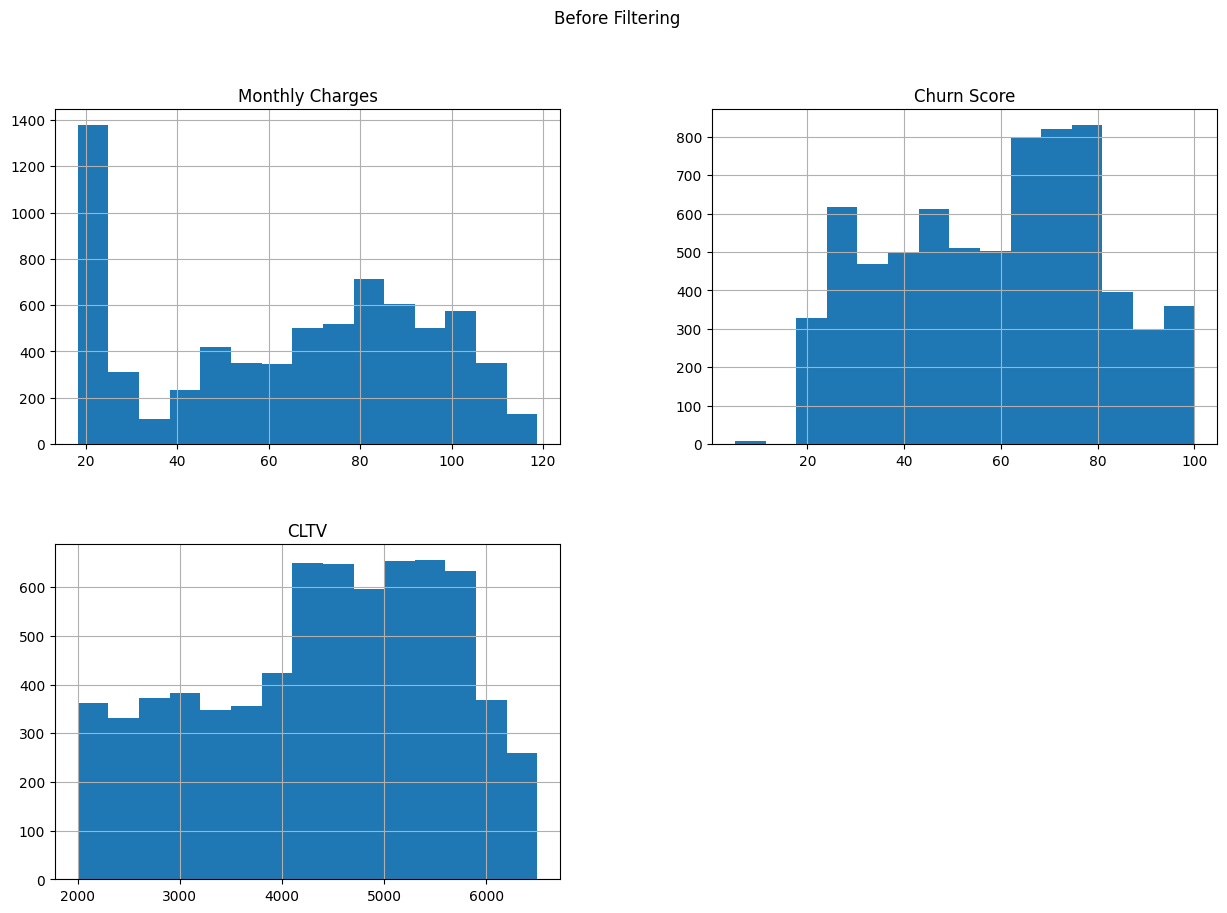

In [12]:
# Columns to check for outliers
outlier_cols = ["Monthly Charges", "Churn Score", "CLTV", "Total Charges"]

df[outlier_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle("Before Filtering")
plt.show()


Column Total Charges contains non-numeric data (strings and mixed types). This needs to be addressed before performing operations like calculating Z-scores.

In [13]:
print(df['Total Charges'].dtype)


object


In [14]:
# Convert 'Total Charges' to numeric, setting errors='coerce' to handle non-numeric values
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [15]:
from scipy.stats import zscore

# Calculate Z-Scores
z_scores = df[outlier_cols].apply(zscore)

# Filter rows where Z-Scores are less than 3 in absolute value
df_zscore_filtered = df[(z_scores < 3).all(axis=1)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after Z-Score filtering: {df_zscore_filtered.shape}")


Original dataset shape: (7043, 34)
Dataset shape after Z-Score filtering: (0, 34)


In [16]:
# Calculate Z-scores for 'Total Charges'
df['Z_Score'] = zscore(df['Total Charges'])

# Identify outliers
outliers = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
print(outliers)

Empty DataFrame
Columns: [CustomerID, Count, Country, State, City, Lat Long, Latitude, Longitude, Gender, Senior Citizen, Partner, Dependents, Tenure Months, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges, Churn Label, Churn Value, Churn Score, CLTV, Churn Reason, State_freq, City_freq, Z_Score]
Index: []

[0 rows x 35 columns]


In [17]:
# List of numerical columns to analyze for outliers
numerical_cols = ['Monthly Charges', 'Tenure Months']

# Calculate Z-scores for multiple columns
z_scores = df[numerical_cols].apply(zscore)

# Filter rows where Z-scores are within 3 standard deviations
df_filtered = df[(z_scores.abs() < 3).all(axis=1)]

# Compare dataset shapes
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after filtering: {df_filtered.shape}")


Original dataset shape: (7043, 35)
Dataset shape after filtering: (7043, 35)


- Visualize Thresholds

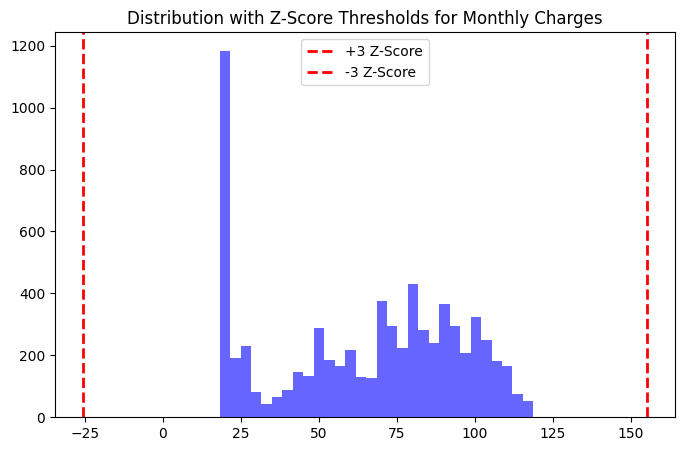

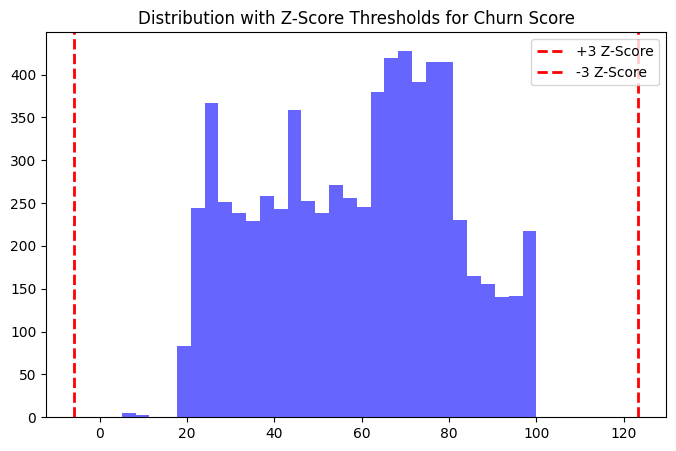

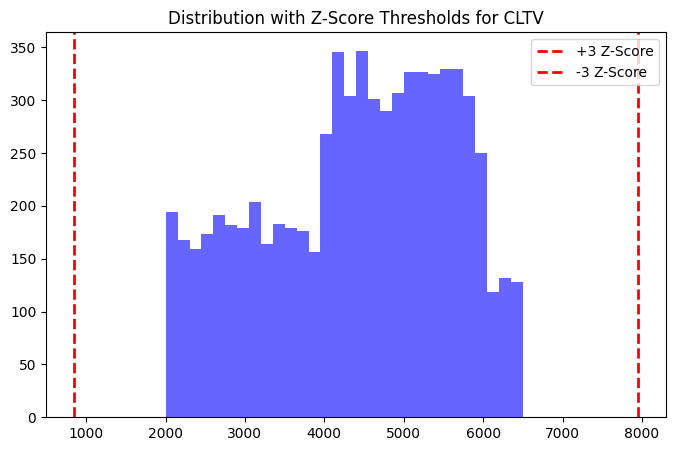

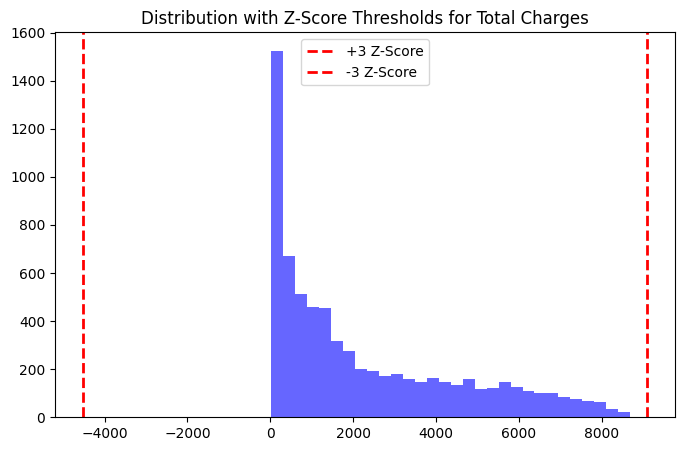

In [18]:
import matplotlib.pyplot as plt

for col in outlier_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, alpha=0.6, color="blue")
    plt.axvline(df[col].mean() + 3 * df[col].std(), color="red", linestyle="dashed", linewidth=2, label="+3 Z-Score")
    plt.axvline(df[col].mean() - 3 * df[col].std(), color="red", linestyle="dashed", linewidth=2, label="-3 Z-Score")
    plt.title(f"Distribution with Z-Score Thresholds for {col}")
    plt.legend()
    plt.show()


- Validate Other Numerical Columns
Extend the outlier detection to other numerical columns (e.g., Monthly Charges, Tenure Months)

##### Robust Outlier Detection Methods

Z-Score filtering was insufficient (skewed data), we are going to use:

### 2.4.2) IQR Method


In [19]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(f"Dataset shape after IQR filtering: {df.shape}")


Dataset shape after IQR filtering: (7043, 35)


**Visualize Thresholds**

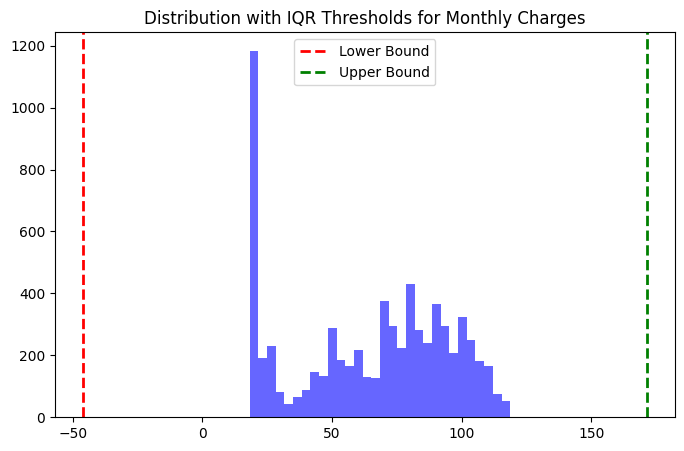

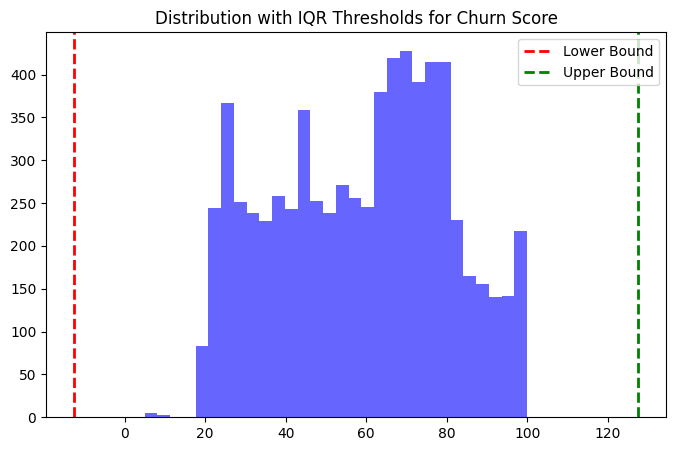

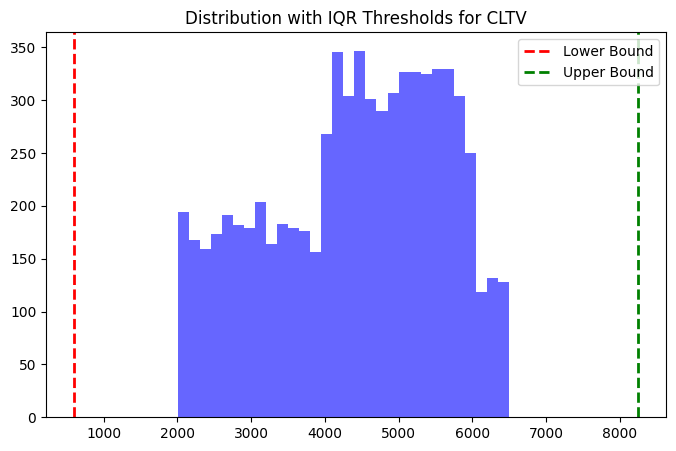

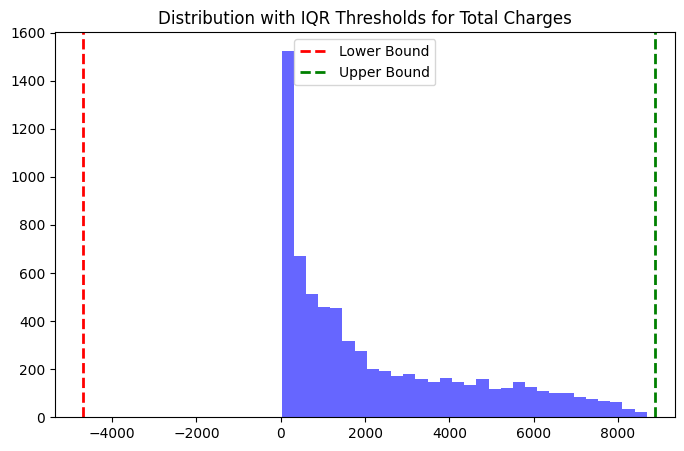

In [20]:
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, alpha=0.6, color="blue")
    plt.axvline(lower_bound, color="red", linestyle="dashed", linewidth=2, label="Lower Bound")
    plt.axvline(upper_bound, color="green", linestyle="dashed", linewidth=2, label="Upper Bound")
    plt.title(f"Distribution with IQR Thresholds for {col}")
    plt.legend()
    plt.show()


##### Visualizing the distributions of Tenure, Monthly Charges, and other numerical variables using boxplots. Boxplots are effective for identifying data distributions and potential outliers.

C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\1831782555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')  # Boxplot for each column
C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\1831782555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')  # Boxplot for each column
C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\1831782555.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='viridis')  # Boxplot for each column
C:\Users\pinto\AppData\Local\Temp\ipy

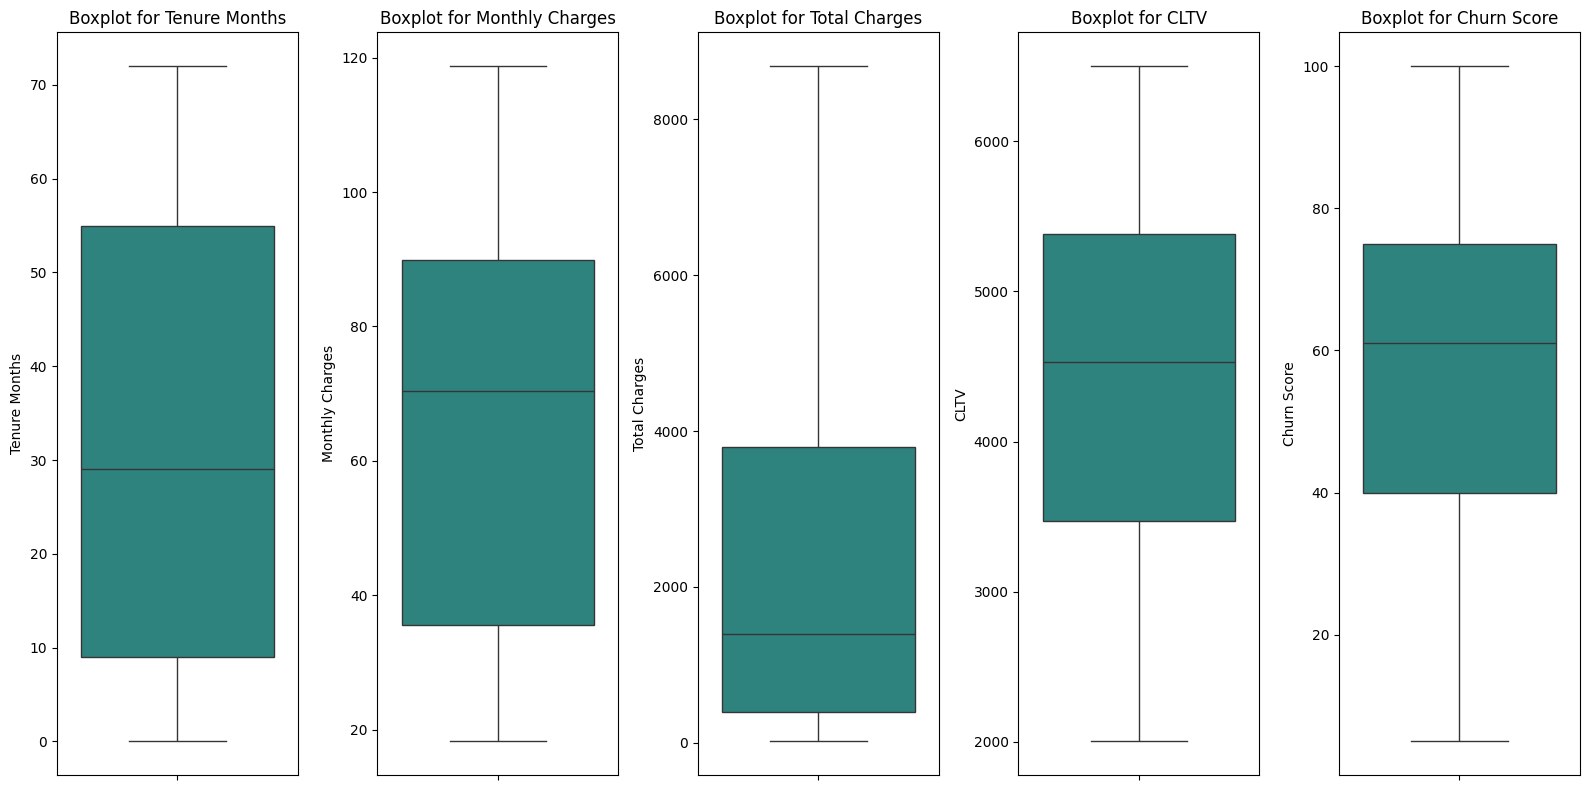

In [21]:
# List of numerical columns to visualize
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Score']

# Create boxplots for each numerical column
plt.figure(figsize=(16, 8))  # Set the figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)  # Create subplots
    sns.boxplot(y=df[col], palette='viridis')  # Boxplot for each column
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.xlabel('')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


There are no extreme outliers in these variables, confirming the dataset's quality and readiness for modeling.

## 3)Exploratory Data Analysis (EDA)

### 3.1) Univariate Analysis

We start by analyzing the distribution of Churn Value to understand the proportion of churned vs. non-churned customers.

C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\663187284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Value', data=df, palette='viridis')


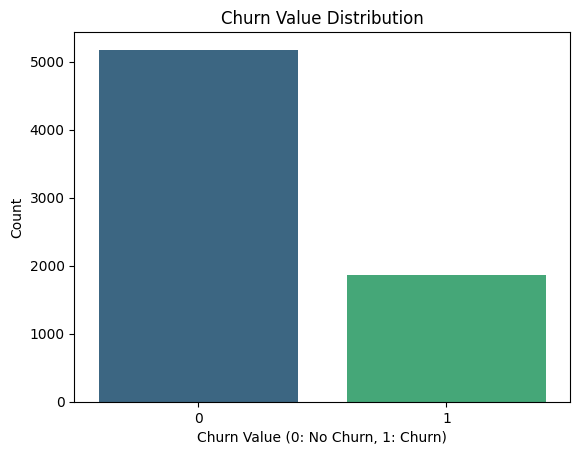

In [22]:

# Count plot of Churn Value
sns.countplot(x='Churn Value', data=df, palette='viridis')
plt.title('Churn Value Distribution')
plt.xlabel('Churn Value (0: No Churn, 1: Churn)')
plt.ylabel('Count')
plt.show()


### 3.2) Bivariate Analysis

Churn Value vs. Monthly Charges

We use boxplots and histograms to explore how Monthly Charges differs between churned and non-churned customers.

C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\3388228412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Value', y='Monthly Charges', data=df, palette='viridis')


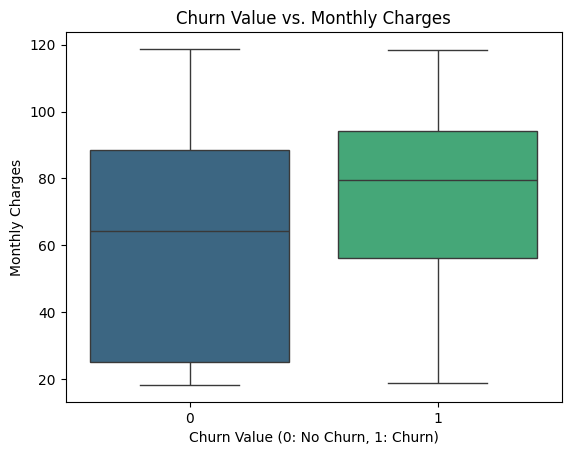

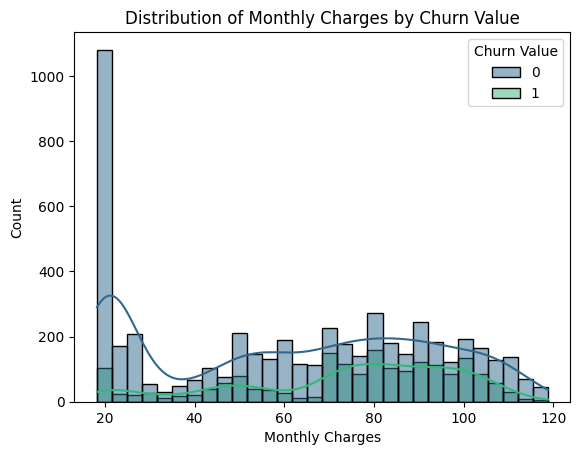

In [23]:
# Boxplot for Monthly Charges by Churn Value
sns.boxplot(x='Churn Value', y='Monthly Charges', data=df, palette='viridis')
plt.title('Churn Value vs. Monthly Charges')
plt.xlabel('Churn Value (0: No Churn, 1: Churn)')
plt.ylabel('Monthly Charges')
plt.show()

# Distribution of Monthly Charges for Churn vs. Non-Churn
sns.histplot(data=df, x='Monthly Charges', hue='Churn Value', kde=True, palette='viridis', bins=30)
plt.title('Distribution of Monthly Charges by Churn Value')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


Churn Value vs. Churn Reason


We create a count plot to visualize the frequency of different Churn Reason categories for churned and non-churned customers.

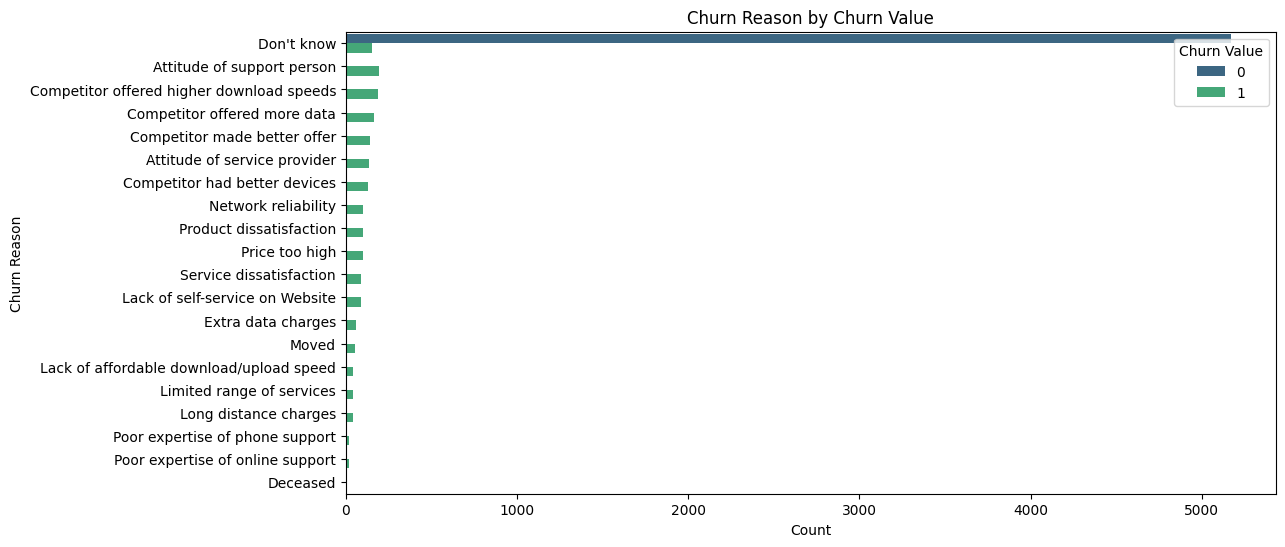

In [24]:
# Count plot of Churn Reason grouped by Churn Value
plt.figure(figsize=(12, 6))
sns.countplot(y='Churn Reason', hue='Churn Value', data=df, palette='viridis', order=df['Churn Reason'].value_counts().index)
plt.title('Churn Reason by Churn Value')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.legend(title='Churn Value', loc='upper right')
plt.show()


### 3.2.1) Correlation Heatmap

We calculate and visualize the correlation matrix for numerical features, including Monthly Charges, Total Charges, CLTV, Churn Score, and Churn Value.

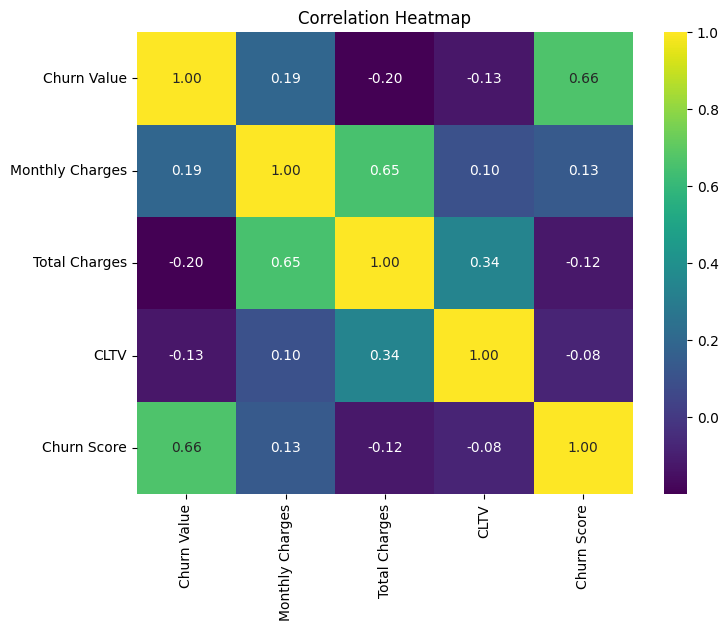

In [25]:
# Compute the correlation matrix
correlation_matrix = df[['Churn Value', 'Monthly Charges', 'Total Charges', 'CLTV', 'Churn Score']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


##### Contract Type: Analyzing whether customers with month-to-month contracts are more likely to churn

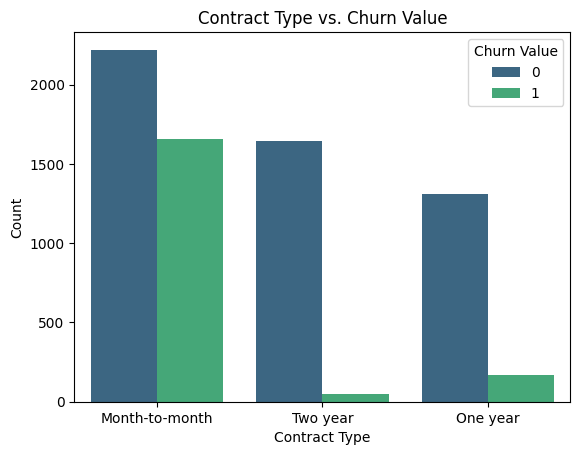

In [26]:
sns.countplot(x='Contract', hue='Churn Value', data=df, palette='viridis')
plt.title('Contract Type vs. Churn Value')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn Value')
plt.show()


- Month-to-month contracts provide flexibility but are associated with higher churn, likely because they allow customers to leave easily.
- Encouraging customers to switch to longer-term contracts (e.g., one-year or two-year) could be a key strategy for retention.

##### Payment Method: Exploring if certain payment methods correlate with churn behavior.

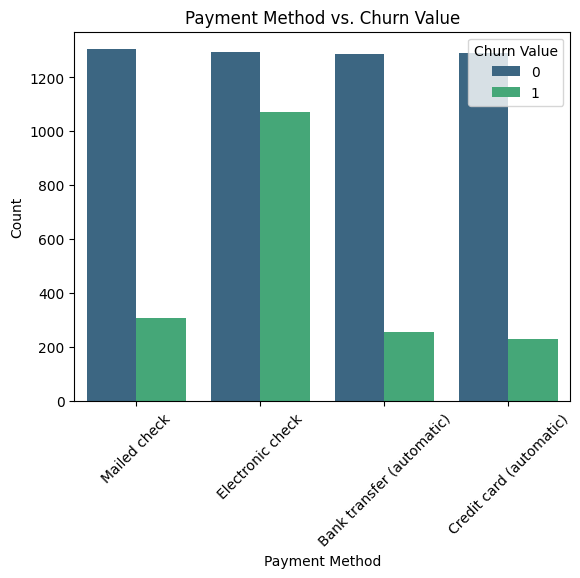

In [27]:
sns.countplot(x='Payment Method', hue='Churn Value', data=df, palette='viridis')
plt.title('Payment Method vs. Churn Value')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn Value')
plt.show()


- Electronic checks may be less convenient or associated with customers who are more price-sensitive, leading to higher churn rates.
- Automatic payments via bank transfers or credit cards may foster loyalty, as customers are less likely to actively cancel services.
- Promoting automatic payment methods could help reduce churn, particularly among electronic check users.

## 4) Feature Engineering

### 4.1) Derive Features

##### 4.1.1) Average Monthly Spend

In [28]:
# Create Average Monthly Spend
df['Avg Monthly Spend'] = df['Total Charges'] / df['Tenure Months']
df['Avg Monthly Spend'] = df['Avg Monthly Spend'].fillna(0)  # Handle division by zero


##### 4.1.2) Churn Risk Category

In [29]:
# Create Churn Risk Category based on Churn Score
def churn_risk_category(score):
    if score <= 40:
        return 'Low'
    elif 40 < score <= 70:
        return 'Medium'
    else:
        return 'High'

df['Churn Risk Category'] = df['Churn Score'].apply(churn_risk_category)


 ##### 4.1.3) Lifetime Revenue

In [30]:
# Lifetime Revenue (equivalent to Total Charges)
df['Lifetime Revenue'] = df['Total Charges']


 **Visualization of Relationships** 

-  Average Monthly Spend vs. Churn Value

Visualize how spending consistency affects churn behavior

C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\3520852273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Value', y='Avg Monthly Spend', data=df, palette='viridis')


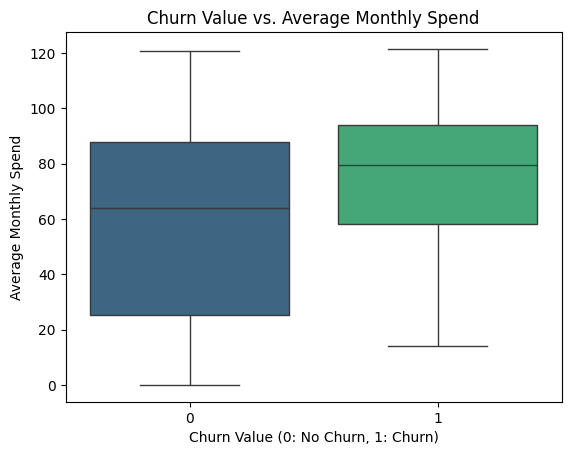

In [31]:
# Boxplot for Avg Monthly Spend by Churn Value
sns.boxplot(x='Churn Value', y='Avg Monthly Spend', data=df, palette='viridis')
plt.title('Churn Value vs. Average Monthly Spend')
plt.xlabel('Churn Value (0: No Churn, 1: Churn)')
plt.ylabel('Average Monthly Spend')
plt.show()


- Churn Risk Category Distribution

Check how churn risk categories correlate with churn behavior.


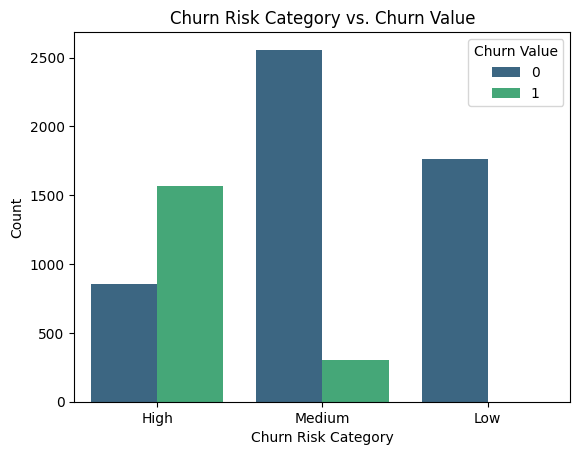

In [32]:
# Count plot for Churn Risk Category vs Churn Value
sns.countplot(x='Churn Risk Category', hue='Churn Value', data=df, palette='viridis')
plt.title('Churn Risk Category vs. Churn Value')
plt.xlabel('Churn Risk Category')
plt.ylabel('Count')
plt.legend(title='Churn Value')
plt.show()


- Lifetime Revenue vs. Churn Value

Analyze the total revenue generated by churned vs. non-churned customers.

C:\Users\pinto\AppData\Local\Temp\ipykernel_13544\95209791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Value', y='Lifetime Revenue', data=df, palette='viridis')


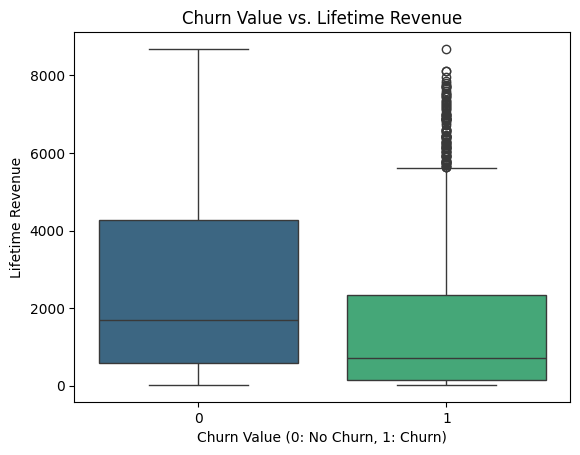

In [33]:
# Boxplot for Lifetime Revenue by Churn Value
sns.boxplot(x='Churn Value', y='Lifetime Revenue', data=df, palette='viridis')
plt.title('Churn Value vs. Lifetime Revenue')
plt.xlabel('Churn Value (0: No Churn, 1: Churn)')
plt.ylabel('Lifetime Revenue')
plt.show()


### 4.3) Correlation Analysis

Check if newly engineered features are correlated with churn.

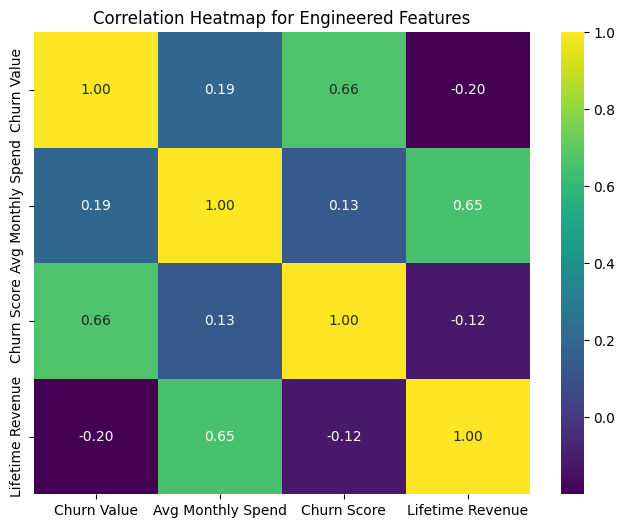

In [34]:
# Correlation matrix for newly engineered features and Churn Value
engineered_features = ['Avg Monthly Spend', 'Churn Score', 'Lifetime Revenue']
correlation_matrix = df[['Churn Value'] + engineered_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap for Engineered Features')
plt.show()


#### 4.3.1) Confirming Dataset Readiness and Validating Derived Features

In [35]:
# Check for invalid values in derived features
print("Invalid Avg Monthly Spend:")
print(df['Avg Monthly Spend'].isnull().sum())

# Replace or fix if necessary
df['Avg Monthly Spend'] = df['Avg Monthly Spend'].fillna(0)


Invalid Avg Monthly Spend:
0


Churn Rate: 26.54%


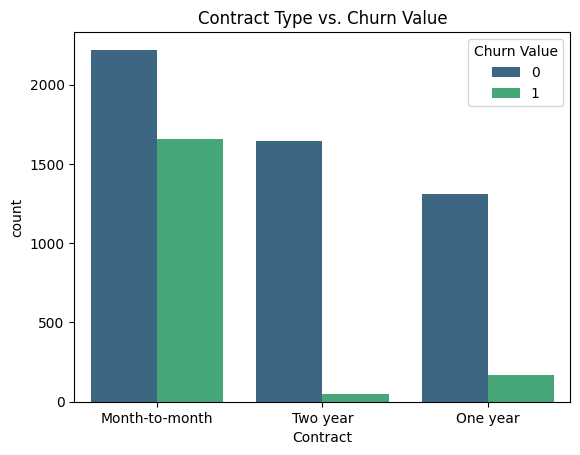

In [36]:
# Churn rate
churn_rate = df['Churn Value'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

# Visualize categorical relationships
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Contract', hue='Churn Value', data=df, palette='viridis')
plt.title('Contract Type vs. Churn Value')
plt.show()


## 5) Save the processed data

In [38]:
# Save the preprocessed data
df.to_csv("../data/processed/cleaned_data1.csv", index=False)
